In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import pickle
import time
#
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

datapath = '../Data/'

startTime = time.time()

In [2]:
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/mtcars.csv"

data_full = pd.read_csv(url)
data = data_full[["mpg", "disp", "drat", "wt", "qsec", "hp"]]
data.head()

,mpg,disp,drat,wt,qsec,hp
0,21.0,160.0,3.90,2.620,16.46,110
1,21.0,160.0,3.90,2.875,17.02,110
2,22.8,108.0,3.85,2.320,18.61,93
3,21.4,258.0,3.08,3.215,19.44,110
4,18.7,360.0,3.15,3.440,17.02,175


In [3]:
X = data[["mpg", "disp", "drat", "wt", "qsec"]]
y = data[["hp"]]

In [4]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

In [7]:
# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'hp')

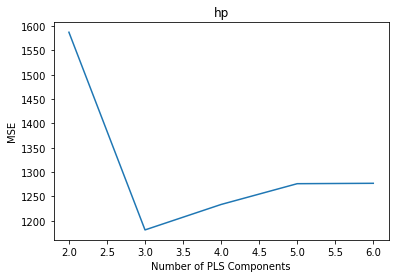

In [8]:
#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

# My Data

In [10]:
del X, y, mse, cv

In [11]:
import pickle

In [12]:
filename = 'ann_ready.pickle'
infile = open(datapath+filename,'rb')
data = pickle.load(infile)
X = data['X']
Y = data['Y']
infile.close()

print(type(X))
print(f'Format: (num_data_objects, max_sequence_length, num_vars) = {X.shape}')
print('\nX')
print(X[1])
print('\nY')
print(Y[1])

<class 'numpy.ndarray'>
Format: (num_data_objects, max_sequence_length, num_vars) = (85217, 59, 17)

X
[[0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.0000e+00 2.0000e+00 5.2212e+04]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.0000e+00 2.0000e+00 5.2212e+04]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.0000e+00 2.0000e+00 5.2212e+04]]

Y
['10001-114314' False]


In [13]:
n = 500

X_sample = X[:n].copy()
Y_sample = Y[:n].copy()

Y_sample[:3]

array([['100002-19995', False],
       ['10001-114314', False],
       ['100011-108357', False]], dtype=object)

## Just look at slope of trend line for each feature in X

In [17]:
from statsmodels.api import OLS

In [18]:
X_sample.shape

(500, 59, 17)

In [23]:
# Testing
play = X_sample[0, :, 0]
timesteps = np.arange(0, X_sample.shape[1])
ols = OLS(play, timesteps).fit()
ols.params[0]

0.0

In [25]:
people = np.arange(0, X_sample.shape[0])
timesteps = np.arange(0, X_sample.shape[1])
features = np.arange(0, X_sample.shape[2])

X_slope = np.zeros(shape=(len(people), len(features)))

for person in people:
    for feature in features:
        ols = OLS(X_sample[person, :, feature], timesteps).fit()
        X_slope[person, feature] = ols.params[0]

In [29]:
Y_slope = Y_sample[:, 1]
Y_labels = Y_sample[:, 0]

In [30]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []

In [36]:
# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 10):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_slope), Y_slope, cv=cv,
               scoring='mean_squared_error').mean()
    mse.append(score)

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [37]:
import sklearn as sk

In [39]:
list(sk.metrics.SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [33]:
model_selection.cross_val_score?

Signature:
model_selection.cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callabl

Text(0.5, 1.0, 'hp')

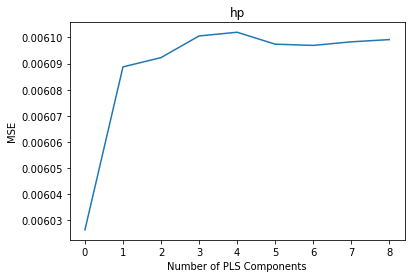

In [32]:
#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')